In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import re

In [2]:
dir_prefix = 'data/'

### 1. Creating tables 'Division', 'Voting Results'

In [3]:
df1 = pd.read_excel(
    dir_prefix+'australian_marriage_law_postal_survey_2017_-_response_final.xls',
    sheet_name='Table 2',
    skiprows=range(6),
    skipfooter=12,
    usecols='A:G'
)
df1.head()

,Unnamed: 0,no.,%,no..1,%.1,no..2,%.2
0,New South Wales Divisions,NaN,NaN,NaN,NaN,NaN,NaN
1,Banks,37736.0,44.9,46343.0,55.1,84079.0,100.0
2,Barton,37153.0,43.6,47984.0,56.4,85137.0,100.0
3,Bennelong,42943.0,49.8,43215.0,50.2,86158.0,100.0
4,Berowra,48471.0,54.6,40369.0,45.4,88840.0,100.0


In [4]:
df1.columns = [
    'region',
    'yes_count',
    'yes_percent',
    'no_count',
    'no_percent',
    'total_count',
    'total_percent'
]
df1.head()

,region,yes_count,yes_percent,no_count,no_percent,total_count,total_percent
0,New South Wales Divisions,NaN,NaN,NaN,NaN,NaN,NaN
1,Banks,37736.0,44.9,46343.0,55.1,84079.0,100.0
2,Barton,37153.0,43.6,47984.0,56.4,85137.0,100.0
3,Bennelong,42943.0,49.8,43215.0,50.2,86158.0,100.0
4,Berowra,48471.0,54.6,40369.0,45.4,88840.0,100.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         165 non-null    object 
 1   yes_count      157 non-null    float64
 2   yes_percent    157 non-null    float64
 3   no_count       157 non-null    float64
 4   no_percent     157 non-null    float64
 5   total_count    157 non-null    float64
 6   total_percent  157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


<AxesSubplot:>

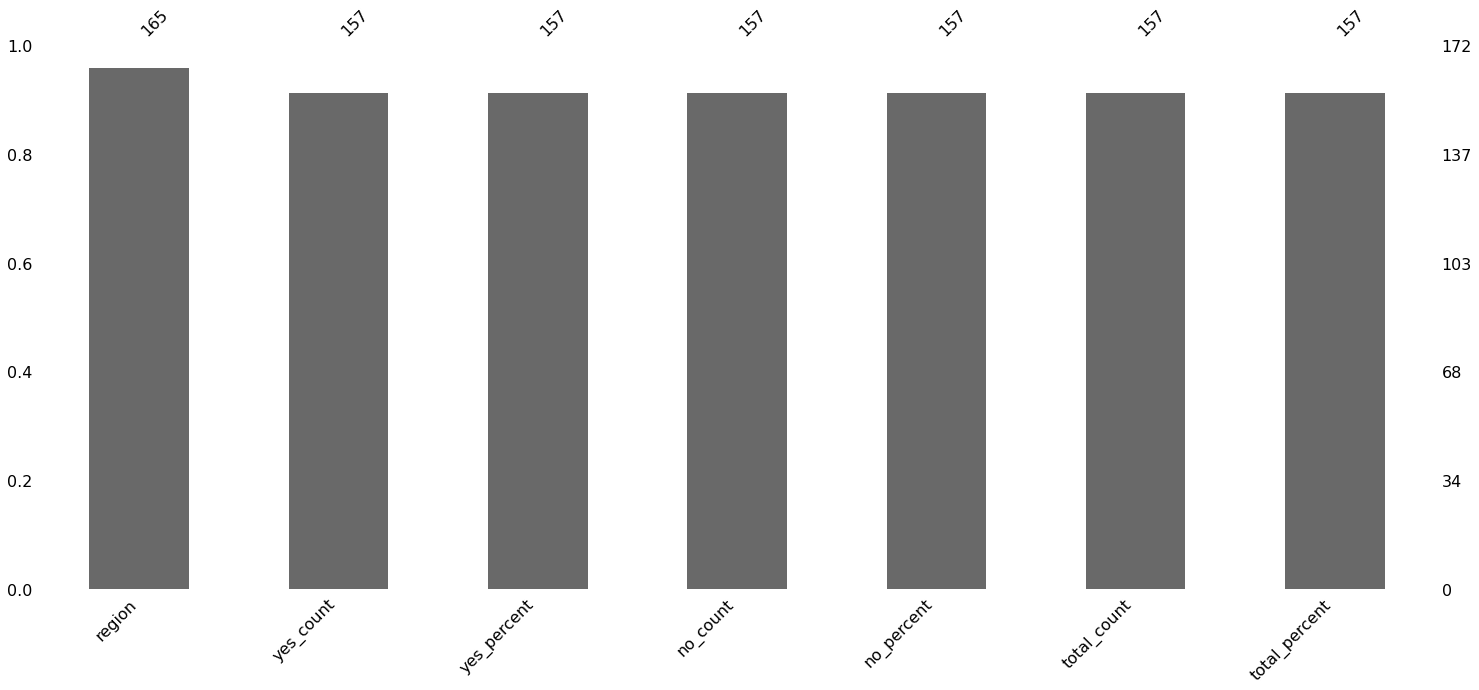

In [6]:
msno.bar(df1)

<AxesSubplot:>

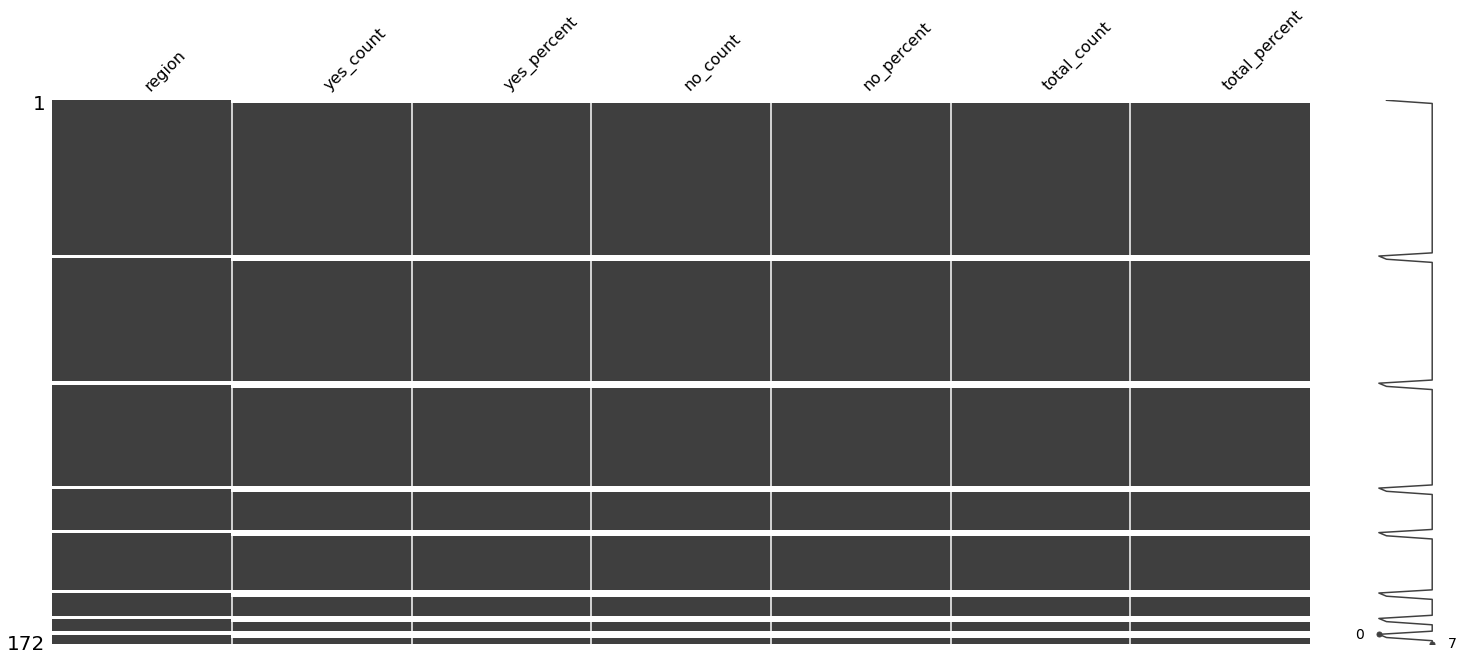

In [7]:
msno.matrix(df1)

We can see that lines are either fully blanc, or have only one non null parameter (australlian land division name)

In [8]:
df1.drop('total_percent', axis='columns', inplace=True)
df1.head()

,region,yes_count,yes_percent,no_count,no_percent,total_count
0,New South Wales Divisions,NaN,NaN,NaN,NaN,NaN
1,Banks,37736.0,44.9,46343.0,55.1,84079.0
2,Barton,37153.0,43.6,47984.0,56.4,85137.0
3,Bennelong,42943.0,49.8,43215.0,50.2,86158.0
4,Berowra,48471.0,54.6,40369.0,45.4,88840.0


In [9]:
df1.insert(0, 'division', np.nan)
df1.head()

,division,region,yes_count,yes_percent,no_count,no_percent,total_count
0,NaN,New South Wales Divisions,NaN,NaN,NaN,NaN,NaN
1,NaN,Banks,37736.0,44.9,46343.0,55.1,84079.0
2,NaN,Barton,37153.0,43.6,47984.0,56.4,85137.0
3,NaN,Bennelong,42943.0,49.8,43215.0,50.2,86158.0
4,NaN,Berowra,48471.0,54.6,40369.0,45.4,88840.0


In [10]:
df1_ext = df1.copy() 

In [11]:
df1_ext.dropna(thresh=1, inplace=True)
df1_ext

,division,region,yes_count,yes_percent,no_count,no_percent,total_count
0,NaN,New South Wales Divisions,NaN,NaN,NaN,NaN,NaN
1,NaN,Banks,37736.0,44.9,46343.0,55.1,84079.0
2,NaN,Barton,37153.0,43.6,47984.0,56.4,85137.0
3,NaN,Bennelong,42943.0,49.8,43215.0,50.2,86158.0
4,NaN,Berowra,48471.0,54.6,40369.0,45.4,88840.0
...,...,...,...,...,...,...,...
166,NaN,Solomon,29660.0,65.3,15792.0,34.7,45452.0
167,NaN,Northern Territory (Total),48686.0,60.6,31690.0,39.4,80376.0
169,NaN,Australian Capital Territory Divisions,NaN,NaN,NaN,NaN,NaN
170,NaN,Canberra(d),89590.0,74.1,31361.0,25.9,120951.0


In [12]:
# Filling division column with AU land divisions corresponding to regions
pattern = re.compile('.*Divisions')
county_name = ''
for line in df1_ext.index:
    l = df1_ext.loc[line, 'region']
    match = re.search(pattern, l)
    if match:
        county_name = l.replace(' Divisions', '')
    else:
        df1_ext.loc[line, 'division'] = county_name

In [13]:
df1_ext.dropna(inplace=True)
df1_ext

,division,region,yes_count,yes_percent,no_count,no_percent,total_count
1,New South Wales,Banks,37736.0,44.9,46343.0,55.1,84079.0
2,New South Wales,Barton,37153.0,43.6,47984.0,56.4,85137.0
3,New South Wales,Bennelong,42943.0,49.8,43215.0,50.2,86158.0
4,New South Wales,Berowra,48471.0,54.6,40369.0,45.4,88840.0
5,New South Wales,Blaxland,20406.0,26.1,57926.0,73.9,78332.0
...,...,...,...,...,...,...,...
165,Northern Territory,Lingiari(c),19026.0,54.5,15898.0,45.5,34924.0
166,Northern Territory,Solomon,29660.0,65.3,15792.0,34.7,45452.0
167,Northern Territory,Northern Territory (Total),48686.0,60.6,31690.0,39.4,80376.0
170,Australian Capital Territory,Canberra(d),89590.0,74.1,31361.0,25.9,120951.0


In [14]:
# Removing lines with totals for division
pattern = re.compile('.*Total.*')
df1_ext = df1_ext[~df1_ext.region.str.match(pattern)]
df1_ext

,division,region,yes_count,yes_percent,no_count,no_percent,total_count
1,New South Wales,Banks,37736.0,44.9,46343.0,55.1,84079.0
2,New South Wales,Barton,37153.0,43.6,47984.0,56.4,85137.0
3,New South Wales,Bennelong,42943.0,49.8,43215.0,50.2,86158.0
4,New South Wales,Berowra,48471.0,54.6,40369.0,45.4,88840.0
5,New South Wales,Blaxland,20406.0,26.1,57926.0,73.9,78332.0
...,...,...,...,...,...,...,...
161,Tasmania,Lyons,35894.0,58.7,25258.0,41.3,61152.0
165,Northern Territory,Lingiari(c),19026.0,54.5,15898.0,45.5,34924.0
166,Northern Territory,Solomon,29660.0,65.3,15792.0,34.7,45452.0
170,Australian Capital Territory,Canberra(d),89590.0,74.1,31361.0,25.9,120951.0


In [15]:
df1_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 171
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   division     150 non-null    object 
 1   region       150 non-null    object 
 2   yes_count    150 non-null    float64
 3   yes_percent  150 non-null    float64
 4   no_count     150 non-null    float64
 5   no_percent   150 non-null    float64
 6   total_count  150 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.4+ KB


In [16]:
df1_ext.describe(include='all')

,division,region,yes_count,yes_percent,no_count,no_percent,total_count
count,150,150,150.000000,150.000000,150.000000,150.000000,150.000000
unique,8,150,NaN,NaN,NaN,NaN,NaN
top,New South Wales,Banks,NaN,NaN,NaN,NaN,NaN
freq,47,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,52114.980000,61.212667,32493.246667,38.787333,84608.226667
std,NaN,NaN,12315.105174,10.177777,8262.788938,10.177777,10318.851968
min,NaN,NaN,19026.000000,26.100000,14860.000000,16.300000,34924.000000
25%,NaN,NaN,44619.750000,55.225000,28452.250000,32.300000,80220.750000
50%,NaN,NaN,51782.500000,61.750000,31653.500000,38.250000,85726.500000
75%,NaN,NaN,59878.750000,67.700000,36726.750000,44.775000,90369.750000


In [17]:
# Checking if the data is adding up. Seems like there are no typos
( (df1_ext['yes_percent'] + df1_ext['no_percent'] == 100).count(),
(df1_ext['yes_count'] + df1_ext['no_count'] == df1_ext['total_count']).count() )

(150, 150)

In [18]:
# No floating numbers of people, as it should be
( (df1_ext['yes_count'].astype(np.int64) == df1_ext['yes_count']).count(),
  (df1_ext['no_count'].astype(np.int64) == df1_ext['no_count']).count(),
  (df1_ext['total_count'].astype(np.int64) == df1_ext['total_count']).count() )

(150, 150, 150)

In [19]:
# Converting vote counts to integer
df1_ext.loc[:, 'yes_count'] = df1_ext['yes_count'].astype(np.int64)
df1_ext.loc[:, 'no_count'] = df1_ext['no_count'].astype(np.int64)
df1_ext.loc[:, 'total_count'] = df1_ext['total_count'].astype(np.int64)

C:\Users\NPopo\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [20]:
df1_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 171
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   division     150 non-null    object 
 1   region       150 non-null    object 
 2   yes_count    150 non-null    int64  
 3   yes_percent  150 non-null    float64
 4   no_count     150 non-null    int64  
 5   no_percent   150 non-null    float64
 6   total_count  150 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 9.4+ KB


In [21]:
df1_ext.head()

,division,region,yes_count,yes_percent,no_count,no_percent,total_count
1,New South Wales,Banks,37736,44.9,46343,55.1,84079
2,New South Wales,Barton,37153,43.6,47984,56.4,85137
3,New South Wales,Bennelong,42943,49.8,43215,50.2,86158
4,New South Wales,Berowra,48471,54.6,40369,45.4,88840
5,New South Wales,Blaxland,20406,26.1,57926,73.9,78332


In [22]:
# Creating separate table for divisions referencing
df_au_divs = df1_ext.loc[:, ['division', 'region']]
df_au_divs

,division,region
1,New South Wales,Banks
2,New South Wales,Barton
3,New South Wales,Bennelong
4,New South Wales,Berowra
5,New South Wales,Blaxland
...,...,...
161,Tasmania,Lyons
165,Northern Territory,Lingiari(c)
166,Northern Territory,Solomon
170,Australian Capital Territory,Canberra(d)


In [23]:
df1 = df1_ext.drop('division', axis='columns')
df1.head()

,region,yes_count,yes_percent,no_count,no_percent,total_count
1,Banks,37736,44.9,46343,55.1,84079
2,Barton,37153,43.6,47984,56.4,85137
3,Bennelong,42943,49.8,43215,50.2,86158
4,Berowra,48471,54.6,40369,45.4,88840
5,Blaxland,20406,26.1,57926,73.9,78332


### 2. Creating table Voter

In [24]:
df2 = pd.read_excel(
    dir_prefix+'australian_marriage_law_postal_survey_2017_-_response_final.xls',
    sheet_name='Table 2',
    skiprows=range(7),
    skipfooter=12,
    usecols='A,I:P'
)
df2.columns = [
    'region',
    'resp_clear_count',
    'resp_clear_percent',
    'resp_not_clear_count',
    'resp_not_clear_percent',
    'non_resp_count',
    'non_resp_percent',
    'total_count',
    'total_percent'
]
df2.head()

,region,resp_clear_count,resp_clear_percent,resp_not_clear_count,resp_not_clear_percent,non_resp_count,non_resp_percent,total_count,total_percent
0,Banks,84079.0,79.9,247.0,0.2,20928.0,19.9,105254.0,100.0
1,Barton,85137.0,77.8,226.0,0.2,24008.0,22.0,109371.0,100.0
2,Bennelong,86158.0,81.0,244.0,0.2,19973.0,18.8,106375.0,100.0
3,Berowra,88840.0,84.5,212.0,0.2,16038.0,15.3,105090.0,100.0
4,Blaxland,78332.0,75.0,220.0,0.2,25883.0,24.8,104435.0,100.0


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  164 non-null    object 
 1   resp_clear_count        157 non-null    float64
 2   resp_clear_percent      157 non-null    float64
 3   resp_not_clear_count    157 non-null    float64
 4   resp_not_clear_percent  157 non-null    float64
 5   non_resp_count          157 non-null    float64
 6   non_resp_percent        157 non-null    float64
 7   total_count             157 non-null    float64
 8   total_percent           157 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.1+ KB


<AxesSubplot:>

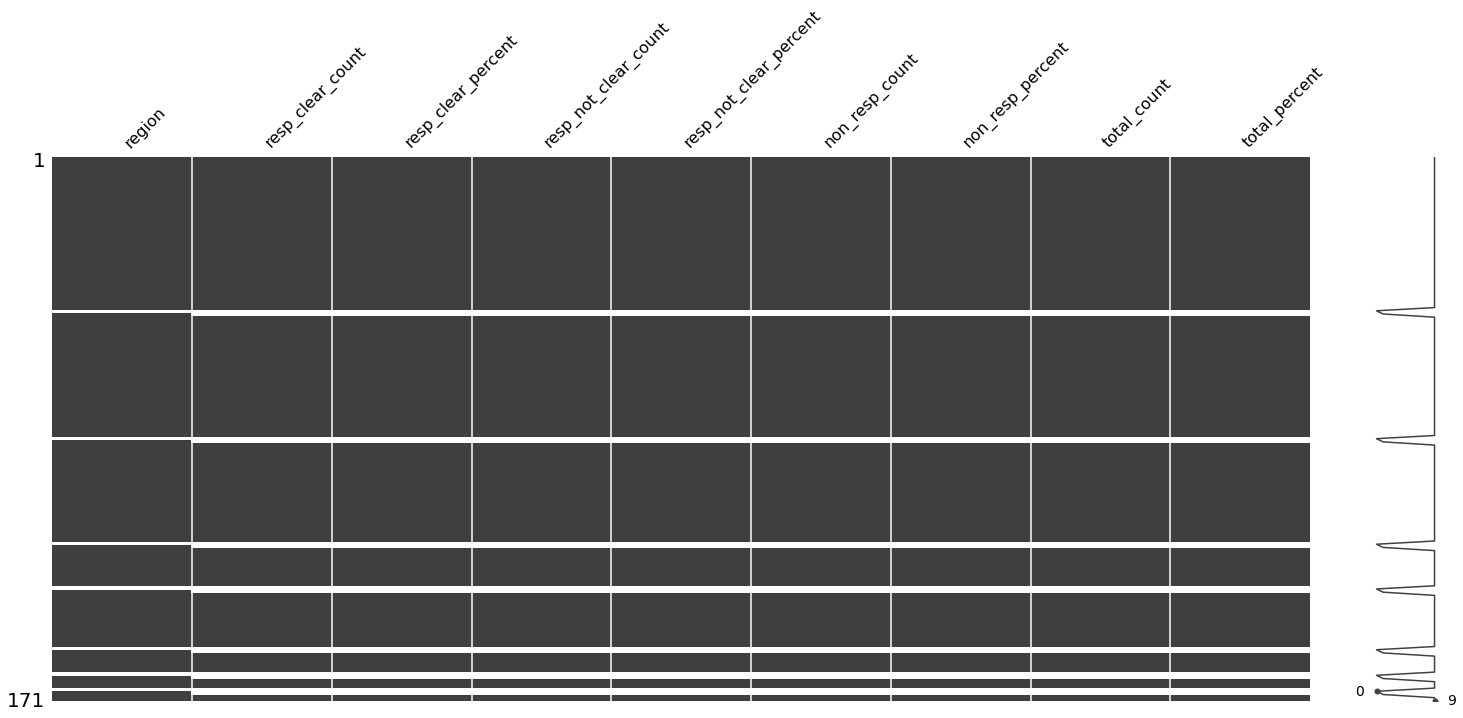

In [26]:
msno.matrix(df2)

The situation is the same as with df1

In [27]:
df2.drop('total_percent', axis='columns', inplace=True)
df2.head()

,region,resp_clear_count,resp_clear_percent,resp_not_clear_count,resp_not_clear_percent,non_resp_count,non_resp_percent,total_count
0,Banks,84079.0,79.9,247.0,0.2,20928.0,19.9,105254.0
1,Barton,85137.0,77.8,226.0,0.2,24008.0,22.0,109371.0
2,Bennelong,86158.0,81.0,244.0,0.2,19973.0,18.8,106375.0
3,Berowra,88840.0,84.5,212.0,0.2,16038.0,15.3,105090.0
4,Blaxland,78332.0,75.0,220.0,0.2,25883.0,24.8,104435.0


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  164 non-null    object 
 1   resp_clear_count        157 non-null    float64
 2   resp_clear_percent      157 non-null    float64
 3   resp_not_clear_count    157 non-null    float64
 4   resp_not_clear_percent  157 non-null    float64
 5   non_resp_count          157 non-null    float64
 6   non_resp_percent        157 non-null    float64
 7   total_count             157 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.8+ KB


In [29]:
# Removing blank lines and totals
df2.dropna(inplace=True)
df2 = df2[~df2.region.str.match(pattern)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 170
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  150 non-null    object 
 1   resp_clear_count        150 non-null    float64
 2   resp_clear_percent      150 non-null    float64
 3   resp_not_clear_count    150 non-null    float64
 4   resp_not_clear_percent  150 non-null    float64
 5   non_resp_count          150 non-null    float64
 6   non_resp_percent        150 non-null    float64
 7   total_count             150 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.5+ KB


In [30]:
df2.describe()

,resp_clear_count,resp_clear_percent,resp_not_clear_count,resp_not_clear_percent,non_resp_count,non_resp_percent,total_count
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,84608.226667,79.170000,244.573333,0.224667,21855.066667,20.602000,106707.866667
std,10318.851968,4.338508,55.895198,0.049067,4197.465972,4.347081,10820.172983
min,34924.000000,50.000000,106.000000,0.100000,13092.000000,14.000000,68217.000000
25%,80220.750000,77.025000,207.250000,0.200000,18951.000000,17.800000,102355.000000
50%,85726.500000,79.700000,240.000000,0.200000,21416.500000,20.000000,106399.000000
75%,90369.750000,82.000000,276.000000,0.300000,24513.250000,22.775000,111871.250000
max,120951.000000,85.800000,377.000000,0.400000,35841.000000,49.900000,145631.000000


In [31]:
# No floating numbers of people, as it should be
(
    (df2['resp_clear_count'].astype(np.int64) == df2['resp_clear_count']).count(),
    (df2['resp_not_clear_count'].astype(np.int64) == df2['resp_not_clear_count']).count(),
    (df2['non_resp_count'].astype(np.int64) == df2['non_resp_count']).count(),
    (df2['total_count'].astype(np.int64) == df2['total_count']).count()
)

(150, 150, 150, 150)

In [32]:
# Checking if the data is adding up. Seems like there are no typos
(
(df2['resp_clear_percent'] + df2['resp_not_clear_percent'] + df2['non_resp_percent'] == 100).count(),
(df2['resp_clear_count'] + df2['resp_not_clear_count'] + df2['non_resp_count'] == df2['total_count']).count()
)

(150, 150)

In [33]:
# Converting voter counts to integer
df2.loc[:, 'resp_clear_count'] = df2['resp_clear_count'].astype(np.int64)
df2.loc[:, 'resp_not_clear_count'] = df2['resp_not_clear_count'].astype(np.int64)
df2.loc[:, 'non_resp_count'] = df2['non_resp_count'].astype(np.int64)
df2.loc[:, 'total_count'] = df2['total_count'].astype(np.int64)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 170
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  150 non-null    object 
 1   resp_clear_count        150 non-null    int64  
 2   resp_clear_percent      150 non-null    float64
 3   resp_not_clear_count    150 non-null    int64  
 4   resp_not_clear_percent  150 non-null    float64
 5   non_resp_count          150 non-null    int64  
 6   non_resp_percent        150 non-null    float64
 7   total_count             150 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 10.5+ KB


In [34]:
df2.head()

,region,resp_clear_count,resp_clear_percent,resp_not_clear_count,resp_not_clear_percent,non_resp_count,non_resp_percent,total_count
0,Banks,84079,79.9,247,0.2,20928,19.9,105254
1,Barton,85137,77.8,226,0.2,24008,22.0,109371
2,Bennelong,86158,81.0,244,0.2,19973,18.8,106375
3,Berowra,88840,84.5,212,0.2,16038,15.3,105090
4,Blaxland,78332,75.0,220,0.2,25883,24.8,104435


In [35]:
writer = pd.ExcelWriter(dir_prefix+'au_marriage_cleaned.xlsx', engine='xlsxwriter')

df_au_divs.to_excel(
    writer,
    sheet_name='Division',
    index=False
)
df1.to_excel(
    writer,
    sheet_name='Voting Results',
    index=False
)
df2.to_excel(
    writer,
    sheet_name='Voter',
    index=False
)

In [36]:
writer.save()